# imports, load model

In [57]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mnist import MNIST

import foolbox
from foolbox.zoo import get_model




In [5]:
%load_ext autoreload
%autoreload 2

In [7]:
f = open('target_network.p', 'rb')
t_model = pkl.load(f)
f.close()

In [48]:
path_to_MNIST = '/home/cole/Desktop/other/ML/DATASETS/MNIST'

mndata = MNIST(path_to_MNIST)
X_train, y_train = mndata.load_training()
X_train = np.array(X_train).reshape(-1, 28, 28)
y_train = np.array(y_train)

X_train = X_train / 255.

X_test, y_test = mndata.load_testing()
X_test = np.array(X_test).reshape(-1, 28, 28)
y_test = np.array(y_test)

X_test = X_test / 255.

# tut

In [50]:
# model = foolbox.models.PyTorchModel(
#     model=t_model, bounds=(0, 255), num_classes=10
# )
# model = get_model('https://github.com/bethgelab/mnist_challenge')

# criterion = foolbox.criteria.ConfidentMisclassification(p=0.9)
# distance = foolbox.distances.Linfinity()


In [70]:
criterion = foolbox.criteria.Misclassification()

idx = np.random.randint(X_train.shape[0])
x = X_train[idx].reshape(-1).astype(np.float64)
y = y_train[idx].astype(np.float64)

attacker = foolbox.attacks.ProjectedGradientDescentAttack(
    model=model, distance=foolbox.distances.Linfinity, 
    criterion=criterion, threshold=0.01
)

# x.dtype
x_adv = attacker(x, label=y)

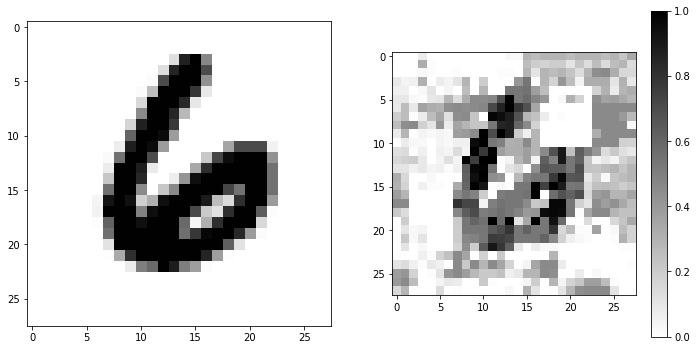

In [71]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(x.reshape(28, 28), cmap=cm.binary)
cs = ax2.imshow(x_adv.reshape(28, 28), cmap=cm.binary)

plt.colorbar(cs, ax=ax2)

plt.show()